## **Lab Assignment 3**

In [37]:
!pip install memory_profiler matplotlib pandas numpy


# Problem 1 – Social Network Friend Suggestion (BFS / DFS)

In [45]:
import time, random
from collections import deque
from memory_profiler import memory_usage
import matplotlib.pyplot as plt

def build_graph(connections):
    graph = {}
    for u, v in connections:
        graph.setdefault(u, []).append(v)
        graph.setdefault(v, []).append(u)
    return graph

def suggest_friends(graph, user):
    visited = set([user])
    q = deque([user])
    friends = set(graph[user])
    suggestions = set()
    while q:
        node = q.popleft()
        for friend in graph.get(node, []):
            if friend not in visited:
                visited.add(friend)
                q.append(friend)
                if friend not in friends and friend != user:
                    suggestions.add(friend)
    return suggestions

# Example
connections = [("A","B"),("A","C"),("B","D"),("C","E"),("D","F")]
G = build_graph(connections)
print("Suggested friends for A:", suggest_friends(G,"A"))


Suggested friends for A: {'F', 'E', 'D'}


Complexity: O(V + E)
Space: O(V + E)
Trade-offs: Fast on sparse networks; scales linearly.
Domain: Social media – mutual friend suggestions.

n=10: time=0.00002s mem=197.73MB
n=50: time=0.00005s mem=197.73MB
n=100: time=0.00012s mem=197.73MB
n=200: time=0.00023s mem=197.73MB
n=400: time=0.00040s mem=197.73MB


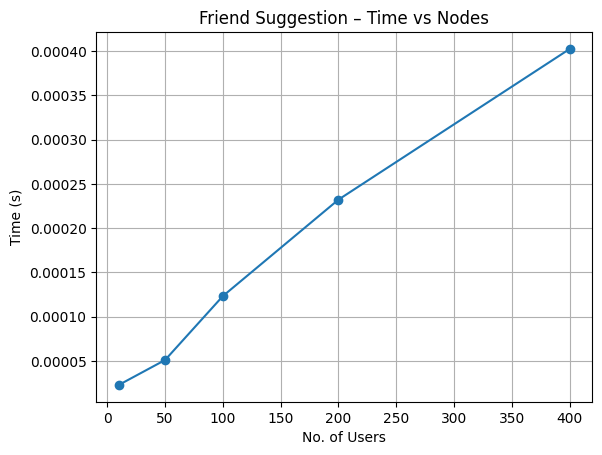

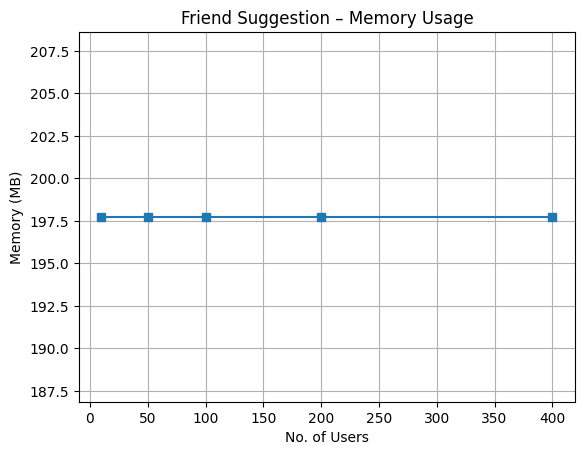

In [46]:
import pandas as pd

sizes=[10,50,100,200,400]
times=[];mems=[]
for n in sizes:
    nodes=[chr(65+i) for i in range(n)]
    edges=[(random.choice(nodes), random.choice(nodes)) for _ in range(n*2)]
    G=build_graph(edges)
    start=time.time(); suggest_friends(G, nodes[0])
    t=time.time()-start
    m=max(memory_usage((suggest_friends,(G,nodes[0]),{})))
    times.append(t);mems.append(m)
    print(f"n={n}: time={t:.5f}s mem={m:.2f}MB")

plt.plot(sizes,times,marker='o');plt.title("Friend Suggestion – Time vs Nodes")
plt.xlabel("No. of Users");plt.ylabel("Time (s)");plt.grid();plt.show()
plt.plot(sizes,mems,marker='s');plt.title("Friend Suggestion – Memory Usage")
plt.xlabel("No. of Users");plt.ylabel("Memory (MB)");plt.grid();plt.show()


# Problem 2 – Route Finding (Google Maps / Bellman-Ford)

In [47]:
def bellman_ford(vertices, edges, source):
    dist={v:float('inf') for v in vertices}
    dist[source]=0
    for _ in range(len(vertices)-1):
        for u,v,w in edges:
            if dist[u]+w < dist[v]:
                dist[v]=dist[u]+w
    # check negative cycle
    for u,v,w in edges:
        if dist[u]+w < dist[v]:
            print("Negative weight cycle detected!")
            return None
    return dist

V=['A','B','C','D']
E=[('A','B',4),('A','C',5),('B','C',-3),('C','D',2)]
print(bellman_ford(V,E,'A'))


{'A': 0, 'B': 4, 'C': 1, 'D': 3}


Complexity: O(V × E)  Space: O(V)
Trade-offs: Handles negative edges; slower than Dijkstra.
Domain: Navigation with possible negative tolls or delays.

Negative weight cycle detected!
Negative weight cycle detected!
Negative weight cycle detected!
Negative weight cycle detected!
Negative weight cycle detected!
Negative weight cycle detected!
Negative weight cycle detected!
Negative weight cycle detected!
Negative weight cycle detected!
Negative weight cycle detected!
Negative weight cycle detected!
Negative weight cycle detected!
Negative weight cycle detected!
Negative weight cycle detected!
Negative weight cycle detected!
Negative weight cycle detected!


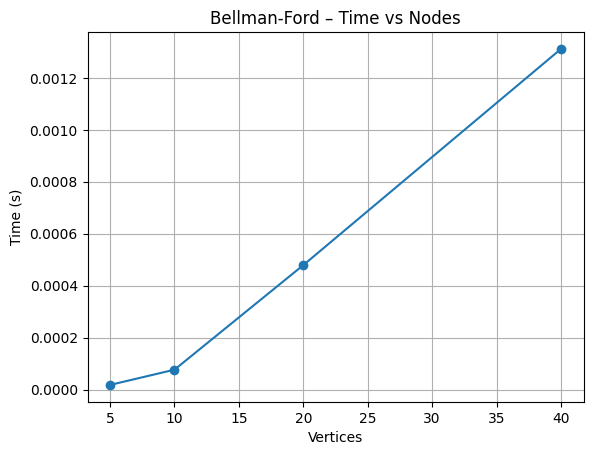

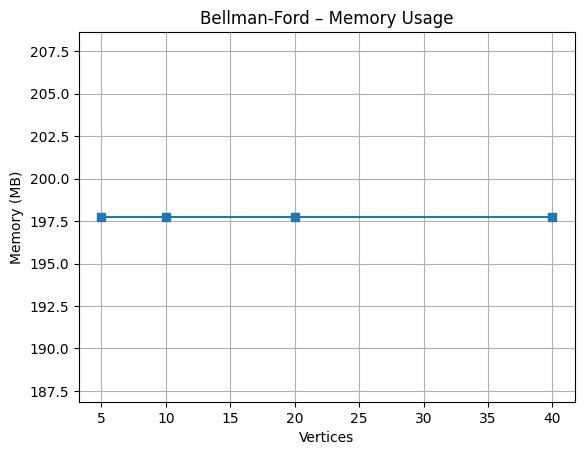

In [48]:
sizes=[5,10,20,40]
times=[];mems=[]
for n in sizes:
    V=[str(i) for i in range(n)]
    E=[(str(random.randint(0,n-1)), str(random.randint(0,n-1)), random.randint(-5,10)) for _ in range(n*3)]
    start=time.time(); bellman_ford(V,E,'0')
    t=time.time()-start
    m=max(memory_usage((bellman_ford,(V,E,'0'))))
    times.append(t);mems.append(m)

plt.plot(sizes,times,marker='o');plt.title("Bellman-Ford – Time vs Nodes")
plt.xlabel("Vertices");plt.ylabel("Time (s)");plt.grid();plt.show()
plt.plot(sizes,mems,marker='s');plt.title("Bellman-Ford – Memory Usage")
plt.xlabel("Vertices");plt.ylabel("Memory (MB)");plt.grid();plt.show()


# Problem 3 – Emergency Response System (Dijkstra)

In [49]:
import heapq

def dijkstra(graph, start):
    pq=[(0,start)]
    dist={node:float('inf') for node in graph}
    dist[start]=0
    while pq:
        d,u=heapq.heappop(pq)
        if d>dist[u]: continue
        for v,w in graph[u]:
            if dist[v]>d+w:
                dist[v]=d+w
                heapq.heappush(pq,(dist[v],v))
    return dist

graph={
    'A':[('B',4),('C',2)],
    'B':[('C',5),('D',10)],
    'C':[('E',3)],
    'D':[('F',11)],
    'E':[('D',4),('F',5)],
    'F':[]
}
print(dijkstra(graph,'A'))


{'A': 0, 'B': 4, 'C': 2, 'D': 9, 'E': 5, 'F': 10}


Complexity: O(E log V) Space: O(V + E)
Trade-offs: Fast for positive-weighted networks; fails with negatives.
Domain: Disaster management – find fastest route.

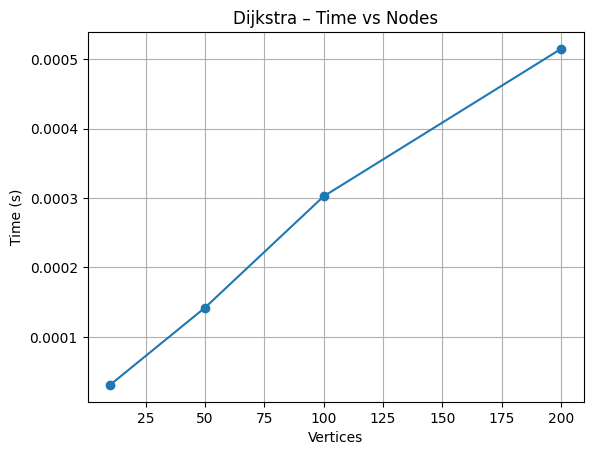

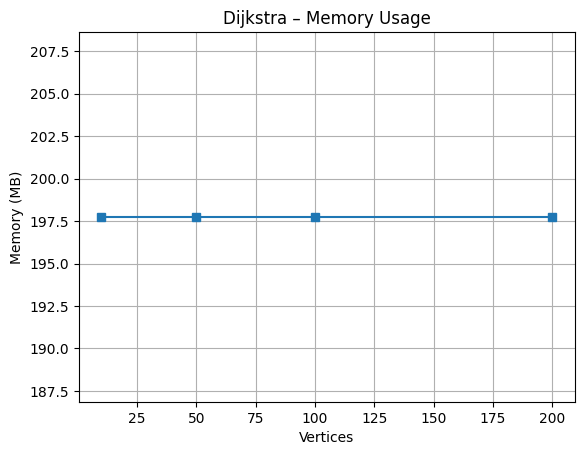

In [50]:
sizes=[10,50,100,200]
times=[];mems=[]
for n in sizes:
    graph={str(i):[] for i in range(n)}
    for _ in range(n*3):
        u,v=random.randint(0,n-1),random.randint(0,n-1)
        if u!=v: graph[str(u)].append((str(v),random.randint(1,20)))
    start=time.time(); dijkstra(graph,'0')
    t=time.time()-start
    m=max(memory_usage((dijkstra,(graph,'0'))))
    times.append(t);mems.append(m)

plt.plot(sizes,times,marker='o');plt.title("Dijkstra – Time vs Nodes")
plt.xlabel("Vertices");plt.ylabel("Time (s)");plt.grid();plt.show()
plt.plot(sizes,mems,marker='s');plt.title("Dijkstra – Memory Usage")
plt.xlabel("Vertices");plt.ylabel("Memory (MB)");plt.grid();plt.show()


# Problem 4 – Network Cable Installation (MST via Prim)

In [51]:
def prim_mst(graph,start):
    visited=set([start])
    edges=[(w,start,v) for v,w in graph[start]]
    import heapq; heapq.heapify(edges)
    mst_cost=0; mst_edges=[]
    while edges:
        w,u,v=heapq.heappop(edges)
        if v not in visited:
            visited.add(v)
            mst_cost+=w
            mst_edges.append((u,v,w))
            for to,wt in graph[v]:
                if to not in visited:
                    heapq.heappush(edges,(wt,v,to))
    return mst_cost,mst_edges

graph={
 'A':[('B',3),('D',1)],
 'B':[('A',3),('C',1),('D',3)],
 'C':[('B',1),('D',1),('E',5)],
 'D':[('A',1),('B',3),('C',1),('E',6)],
 'E':[('C',5),('D',6)]
}
print("MST Cost and Edges:",prim_mst(graph,'A'))


MST Cost and Edges: (8, [('A', 'D', 1), ('D', 'C', 1), ('C', 'B', 1), ('C', 'E', 5)])


Complexity: O(E log V) Space: O(V + E)
Trade-offs: Optimal for connectivity with minimal cost.
Domain: Telecom / infrastructure planning.

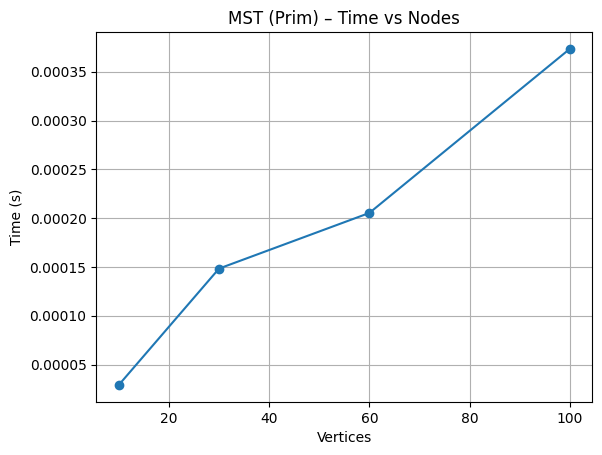

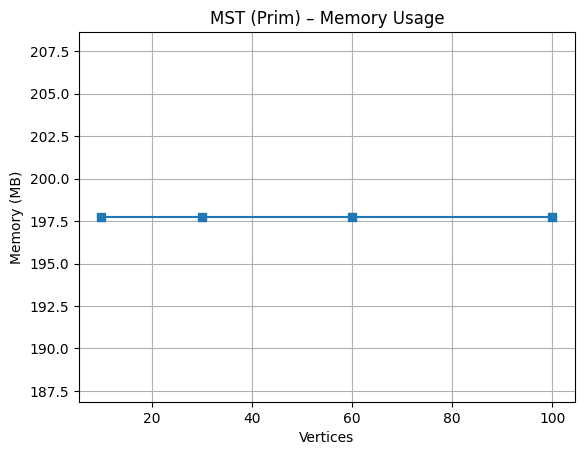

In [52]:
sizes=[10,30,60,100]
times=[];mems=[]
for n in sizes:
    graph={str(i):[] for i in range(n)}
    for _ in range(n*2):
        u,v=random.randint(0,n-1),random.randint(0,n-1)
        if u!=v:
            w=random.randint(1,50)
            graph[str(u)].append((str(v),w))
            graph[str(v)].append((str(u),w))
    start=time.time(); prim_mst(graph,'0')
    t=time.time()-start
    m=max(memory_usage((prim_mst,(graph,'0'))))
    times.append(t);mems.append(m)

plt.plot(sizes,times,marker='o');plt.title("MST (Prim) – Time vs Nodes")
plt.xlabel("Vertices");plt.ylabel("Time (s)");plt.grid();plt.show()
plt.plot(sizes,mems,marker='s');plt.title("MST (Prim) – Memory Usage")
plt.xlabel("Vertices");plt.ylabel("Memory (MB)");plt.grid();plt.show()
